<a href="https://colab.research.google.com/github/marzier/CSC481/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Training loop
        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                # Linear combination
                linear_output = np.dot(x_i, self.weights) + self.bias
                # Apply step function (binary classification)
                y_predicted = self._unit_step(linear_output)

                # Update weights and bias if prediction is wrong
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        # Predict output for the given input X
        linear_output = np.dot(X, self.weights) + self.bias
        return self._unit_step(linear_output)

    def _unit_step(self, x):
        # Step function for binary classification (0 or 1)
        return np.where(x >= 0, 1, 0)


Predictions: [0 0 0 1]


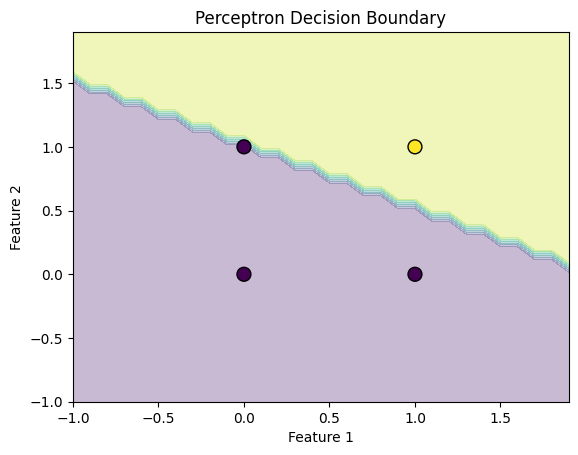

In [3]:
import matplotlib.pyplot as plt

# Generating a simple dataset
# Class 1: (0,0), (1,0)
# Class 2: (0,1), (1,1)
X = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1]
])

# Labels: 0 for Class 1, 1 for Class 2
y = np.array([0, 0, 0, 1])

# Initialize and train the perceptron
p = Perceptron(learning_rate=0.1, n_iterations=10)
p.fit(X, y)

# Testing on the same data
predictions = p.predict(X)
print("Predictions:", predictions)

# Visualize the data points and the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor="k")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Perceptron Decision Boundary")
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, p)
